In [206]:
import numpy as np
from numpy.polynomial import polynomial as P

def innerProductPolynoms(f1, f2, xmin, xmax):
        f1mf2 = P.polysub(f1,f2)
        f1mf2 = P.polymul(f1mf2,f1mf2)
        val = P.polyint(f1mf2,lbnd=xmin)
        #print("val", val)
        ip = np.abs(val[0] + val[1]*(xmax-xmin)+val[2]*(xmax-xmin)**2+val[3]*(xmax-xmin)**3+val[4]*(xmax-xmin)**4+val[5]*(xmax-xmin)**5)
        return np.sqrt(ip)/abs(xmax-xmin)
    
def associatePolynomAndPrior(res, priors):
    ass_list = []
    polynoms = res[-1]
    
    for iprior,prior in enumerate(priors):
        for ipol,polynom in enumerate(polynoms):
            f1 = (prior[0],prior[1],prior[2])
            f2 = (polynom["f"].c[2],polynom["f"].c[1],polynom["f"].c[0])
            xmin = max(prior[3],polynom["x_start"])
            xmax = min(prior[4],polynom["x_end"])
            dist = innerProductPolynoms(f1,f2,xmin,xmax)
            if dist < 2 and xmax-xmin > 5:
                ass_list.append((iprior,ipol))
                
    return ass_list

def ComputeCoeffErrors(res, prior, ipolynom):
    #print(res[-1][ipolynom]["f"],prior)
    a0_err = np.zeros([len(res), 3])
    a1_err = np.zeros([len(res), 3])
    a2_err = np.zeros([len(res), 3])
    for iframe,frame in enumerate(res):
        a0_err[iframe,0] = abs(frame[ipolynom]["f"].c[2] - prior[0])
        a1_err[iframe,1] = abs(frame[ipolynom]["f"].c[1] - prior[1])
        a2_err[iframe,2] = abs(frame[ipolynom]["f"].c[0] - prior[2])
        
    a0_mean_err = np.mean(a0_err)
    a1_mean_err = np.mean(a1_err)
    a2_mean_err = np.mean(a2_err)
    print(f"ComputeCoeffErrors: mean err for prior {prior} = ({a0_mean_err},{a1_mean_err},{a2_mean_err})")
    
    
def ComputePolynomDistance(res, prior, ipolynom):
    dist = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        
        f1 = (prior[0],prior[1],prior[2])
        f2 = (frame[ipolynom]["f"].c[2],frame[ipolynom]["f"].c[1],frame[ipolynom]["f"].c[0])
        xmin = max(prior[3],frame[ipolynom]["x_start"])
        xmax = min(prior[4],frame[ipolynom]["x_end"])
        dist[iframe] = innerProductPolynoms(f1,f2,xmin,xmax)
        #print("f1",f1,"f2",f2,"xmin",xmin,"xmax",xmax,"dist[iframe]",dist[iframe])
        
    dist_mean_err = np.mean(dist)
    dist_max_err = np.max(dist)
    print(f"ComputePolynomDistance: dist_mean_err for prior {prior} = {dist_mean_err}")
    print(f"ComputePolynomDistance: dist_max_err for prior {prior} = {dist_max_err}")
    
def ComputeOverlappingArea(res, prior, ipolynom):
    overlap = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        xmin = max(prior[3],frame[ipolynom]["x_start"])
        xmax = min(prior[4],frame[ipolynom]["x_end"])
        
        xminmin = min(prior[3],frame[ipolynom]["x_start"])
        xmaxmax = max(prior[4],frame[ipolynom]["x_end"])
        overlap[iframe] = np.abs(xmax-xmin)/np.abs(xmaxmax-xminmin)
        
    overlap_mean = np.mean(overlap)
    overlap_min = np.min(overlap)
    print(f"ComputeOverlappingArea: overlap_mean for prior {prior} = {overlap_mean}")
    print(f"ComputeOverlappingArea: overlap_min for prior {prior} = {overlap_min}")
    
def ComputeNonOverlappingArea(res, prior, ipolynom):
    nonoverlap = np.zeros(len(res))
    for iframe,frame in enumerate(res):
        dmin = prior[3]-frame[ipolynom]["x_start"]
        dmax = frame[ipolynom]["x_end"] - prior[4]
        
        dmin = dmin if dmin > 0 else 0
        dmax = dmin if dmax > 0 else 0
        
        nonoverlap[iframe] = dmax + dmin
        
    nonoverlap_mean = np.mean(nonoverlap)
    nonoverlap_max = np.max(nonoverlap)
    print(f"ComputeNonOverlappingArea: onon_verlap_mean for prior {prior} = {nonoverlap_mean}")
    print(f"ComputeNonOverlappingArea: non_overlap_max for prior {prior} = {nonoverlap_max}")
        

def analyzeResults(res, priors):
    ass_list = associatePolynomAndPrior(res, priors)
    print("ass_list", ass_list)
    for iprior,prior in enumerate(priors):
        ComputeCoeffErrors(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputePolynomDistance(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeNonOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])

In [ ]:
%load_ext autoreload
%autoreload 2
from simulation import DynamicSimulation
from tracker import StaticTracker
model = StaticTracker()
#prior = [(0, 0, 0.00001, 3, 40, True), 
        #(10, 0.009, -0.004, 50, 90, True),
        #(40, 0, -0.01, 1, 40, False)]
#prior = [(0, 0, 0.0001, 3, 40)]
prior = [(2.191,1.169,-0.026,7,25,False)]
#prior = [(27.5,-5,0.3,5,16,True)]
#prior = [(25,0,0.13,-20,20,False)]
#prior = [(60,0,-0.2,-15,15,False)]
sim = DynamicSimulation(model,prior=prior)
res = sim.run(N=20)

analyzeResults(res[2:],prior)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/kfir/workspace/RadarLocalization/dataset.py:109: RuntimeWarning: invalid value encountered in power
  dist = np.arange(0,N)*dT*(v0+a0*dT)


frame 0
prior [{'c': (2.191, 1.169, -0.026), 'xmin': 7, 'xmax': 25, 'fx': False}]
Number of point tracks before run() 0
Number of extended tracks before run() 0
len(unique_polynoms) 0
frame 1
prior [{'c': (2.191, 1.169, -0.026), 'xmin': 7, 'xmax': 25, 'fx': False}]
Number of point tracks before run() 120
Number of extended tracks before run() 0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


len(unique_polynoms) 0
frame 2
prior [{'c': (2.191, 1.169, -0.026), 'xmin': 7, 'xmax': 25, 'fx': False}]
Number of point tracks before run() 154
Number of extended tracks before run() 0
Opening flipped polynom!!!
created an extended object! [ 2.83309182  1.11146614 -0.02442325  6.65079543 23.25283273]
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024423245099801677, 1.1114661434910043, 2.8330918172102786) (-0.023725443208229134, 1.0917061676212707, 2.2618626625953904)
Opening flipped polynom!!!
Extended track is too short curve_length=1.8269429341080823
Opening flipped polynom!!!
Extended track is too short curve_length=1.24900143652204
len(unique_polynoms) 0
frame 3
prior [{'c': (2.191, 1.169, -0.026), 'xmin': 7, 'xmax': 25, 'fx': False}]
Number of point tracks before run() 132
Number of extended tracks before run() 1


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02475401305796104, 1.1215249038451505, 2.7484612501663905) (-0.02332803466665354, 1.0807365993994753, 2.3232594929392185)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02475401305796104, 1.1215249038451505, 2.7484612501663905) (-0.02474987492241359, 1.1074332493321637, 3.290429157385628)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02475401305796104, 1.1215249038451505, 2.7484612501663905) (-0.0028514494729648325, 0.5532164612983005, 4.

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02448807756233271, 1.115191272981447, 2.7849600042063094) (-0.02348512119223748, 1.090505262260036, 3.099541788602127)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02448807756233271, 1.115191272981447, 2.78496000420

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024633825511375336, 1.1196647948861809, 2.7594540744321936) (-0.023895260502700376, 1.1027571716968656, 3.0144509487878195)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024633825511375336, 1.1196647948861809, 2.7594540744321936) (-0.02475505626219045, 1.129119646467833, 2.09418601046807

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024208323018992093, 1.107696552477869, 2.834244164239451) (-0.023929627941123976, 1.1046189375278326, 2.9993907585128294)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024208323018

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02431895015989423, 1.1115820881627327, 2.8023691449295973) (-0.024209680380759286, 1.110054812280322, 3.0493577057842876)
Opening flipp

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02415200187675803, 1.1074219015512885, 2.8248421625408575) (-0.024551973077714638, 1.1198642813958963, 2.997047196216076)
Opening flipp

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024411316917624777, 1.1146888709719212, 2.7811954138137183) (-0.024266950404767812, 1.1137548311047516, 3.0277079042567108)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024411316917624777, 1.1146888709719212, 2.7811954138137183) (-0.024663370995699197, 1.1301879451817411, 2.1274250345355377)
Opening flipped polynom!!!
Tra

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024445376390019112, 1.1155171243841302, 2.7760254023843762) (-0.02442832464653777, 1.1186999973373997, 2.9945384943599227)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024445376390019112, 1.1155171243841302, 2.7760254023843762) (-0.02485003779878184, 1.134178809987322, 2.103875068425822

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024424405642781855, 1.1155723608725332, 2.7729372884812618) (-0.024045419054701124, 1.107524148403819, 3.069948993180062)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024424405642781855, 1.1155723608725332, 2.7729372884812618) (-0.02485003779878184, 1.134178809987322, 2.1038750684258223

/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le
/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02426753255949862, 1.110747915066372, 2.801832342102165) (-0.02406911440234479, 1.1081207770705985, 3.0678248104177226)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02426753255949862, 1.110747915066372, 2.801832342102165) (-0.024568107454580254, 1.1242094788450183, 2.181723420724495)
Opening flipped polynom!!!
Tracks are 

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024232539822837337, 1.109888505585994, 2.807269831870899) (-0.023995038782176695, 1.10566244638276, 3.079818287880894)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024232539822837337, 1.109888505585994, 2.807269831870899) (-0.024478916927153156, 1.121407035587529, 2.1989600493581025)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024232539822837337, 1.109888505585994, 2.807269831870899) (-0.018356726368580767, 0.9489716195857374, 2.7789815582869792)
Opening flipped polynom!!!
Extended track is too short curve_length=2.34275147602647
Opening fl

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02417102816451875, 1.1081449806319288, 2.8172419108485647) (-0.024124622912079945, 1.1112606119457369, 2.9976201948317835)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02417102816451875, 1.1081449806319288, 2.8172419108485647) (-0.024362589311626333, 1.1178778129211282, 2.2197813680810117)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02417102816451875, 1.1081449806319288, 2.8172419108485647) (-0.018356726368580767, 0.9489716195857374, 2.7789815582869792)
Opening flipped polynom!!!
Extended track is too short curve_length=2.07255983169839
Opening flipped polynom!!!
Extended tra

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024119585637405218, 1.1066121282865509, 2.8260793104371205) (-0.024186366220009803, 1.1127604963819218, 2.9938561312610505)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024119585637405218, 1.1066121282865509, 2.8260793104371205) (-0.023700359730208835, 1.1014828090003814, 2.311914297791889)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024119585637405218, 1.1066121282865509, 2.8260793104371205) (-0.021107260708363544, 1.0195264206481565, 2.3679595590501523)
Opening flipped polynom!!!
Extended track is too short curve_length=1.8994153847466901
Opening flipped polynom!!!
Extended

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024097930308959747, 1.1059521572320128, 2.8306537534374976) (-0.02386371597676937, 1.1029446774153921, 3.052406593755825)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024097930308959747, 1.1059521572320128, 2.8306537534374976) (-0.023700359730208835, 1.1014828090003814, 2.311914297791889)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.024097930308959747, 1.1059521572320128, 2.8306537534374976) (-0.021107260708363544, 1.0195264206481565, 2.3679595590501523)
Opening flipped polynom!!!
Extended track is too short curve_length=1.8994153847466901
Opening flipped polynom!!!
Extended t

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02400892379630455, 1.1033421147666098, 2.846619261694499) (-0.023645299235177653, 1.0954339434774252, 3.1014519160446627)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02400892379630455, 1.1033421147666098, 2.846619261694499) (-0.023829264288616585, 1.1048582831655303, 2.296122072809794)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.02400892379630455, 1.1033421147666

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0240473258475326, 1.104447575834711, 2.839957657295694) (-0.024260967787675208, 1.1100433490506716, 3.0317602474666745)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0240473258475326, 1.104447575834711, 2.839957657295694) (-0.02380526753130707, 1.104553453753145, 2.2940124075297104)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0240473258475326, 1.104447575834711, 2.839957657295694) (-0.01867096061532701, 0.9609414876335423, 2.694666673996087)
Opening flipped polynom!!!
Extended track is too short curve_length=1.609661265307256
Opening flipped polynom!!!
Extended track is too sh

In [178]:
prior = [(27.5,-5,0.3,10,16.1,True)]
print(res[21:])
analyzeResults(res[21:],prior)

[[{'f': poly1d([  1.09718071, -10.83597746,  34.01642969]), 'x_start': 5.776204946051699, 'x_end': 7.634726083428461, 'fxFlag': False}], [{'f': poly1d([ 0.49354412, -3.46557648,  9.64561674]), 'x_start': 5.794790157425467, 'x_end': 7.616140872054694, 'fxFlag': False}], [{'f': poly1d([  1.04367673, -11.43984101,  38.41297554]), 'x_start': 5.8130036645717595, 'x_end': 7.597927364908402, 'fxFlag': False}], [{'f': poly1d([  1.51122598, -17.86823976,  60.44238428]), 'x_start': 5.264530591429584, 'x_end': 7.551264193909731, 'fxFlag': False}], [{'f': poly1d([  1.51140247, -17.86632244,  60.41928565]), 'x_start': 5.287397927454386, 'x_end': 7.528396857884929, 'fxFlag': False}], [{'f': poly1d([  1.49854861, -17.70098462,  59.89857764]), 'x_start': 5.309807916758691, 'x_end': 7.5059868685806235, 'fxFlag': False}], [{'f': poly1d([  1.49279294, -17.64442596,  59.77084951]), 'x_start': 5.331769706276911, 'x_end': 7.4840250790624046, 'fxFlag': False}], [{'f': poly1d([  1.49852387, -17.71155334,  59.

In [76]:
np.flip(np.array([[2, 3],[4,5]]))

[autoreload of dataset failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/kfir/workspace/RadarLocalization/dataset.py", line 97
    prior_list.append({"c":

array([[5, 4],
       [3, 2]])

In [77]:
np.flip(np.array([[2, 3],[4,5]]))

array([[5, 4],
       [3, 2]])

In [20]:
import scipy.optimize

In [50]:
import numpy as np
import time

px,py = 10,23
a0, a1, a2 = 5, 0.1, 0.01
t1 = time.time()
for i in range(400):
    res = scipy.optimize.minimize(lambda x : np.sqrt((px-x)**2+(py-(a0+i/10.)+a1*x+a2*x**2)**2), x0=[5])
t2 = time.time()
print(t2-t1)
print("res",res.x)
print(res.x, a0 + a1*res.x + a2*res.x**2)
optx = res.x
opty = a0 + a1*res.x + a2*res.x**2

0.43612146377563477
res [17.71929741]
[17.71929741] [9.91166475]


In [55]:
import math
t3 = time.time()
x = np.linspace(-100,100, 100)
y = a0 + a1*x+a2*x**2
for i in range(400):
    a = np.argmin(np.sqrt((x-px)**2+(y-py)**2))
t4 = time.time()
print(t4-t3)
print(x[a], y[a])
print(math.sqrt((x[a]-px)**2+(y[a]-py)**2))
print(math.sqrt((optx-px)**2+(opty-py)**2))

0.008011102676391602
15.151515151515156 8.810835629017449
15.095379886013166
15.195133173954204


In [81]:
import numpy.polynomial.polynomial as P

In [97]:
f1 = (1, 1, 2)
f2 = (1.1, 1, 2.2)
f1mf2 = P.polysub(f1,f2)
f1mf2 = P.polymul(f1mf2,f1mf2)
val = P.polyint(f1mf2,lbnd=-10)
a = P.polyval(-10, val) + P.polyval(5,10)
print(a)

10.0


In [68]:
print (res)

[[{'f': poly1d([-1.02236445e-02,  5.34088473e-03,  3.98952978e+01]), 'x_start': -0.5529887922981365, 'x_end': 39.97303174577813, 'fxFlag': False}, {'f': poly1d([-0.00042631,  0.01510269, -0.11574659]), 'x_start': 4.833046593282244, 'x_end': 38.7783703938952, 'fxFlag': True}, {'f': poly1d([-4.46306256e-03,  6.61758397e-02,  8.85350905e+00]), 'x_start': 50.314965236442816, 'x_end': 77.68272844134319, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.3503586896077549, 'x_end': 39.77040164308775, 'fxFlag': False}, {'f': poly1d([-0.0002941 ,  0.01255984, -0.13503909]), 'x_start': 4.162537176968926, 'x_end': 38.60097408217034, 'fxFlag': True}, {'f': poly1d([-1.94101401e-03, -2.51104960e-01,  1.84207231e+01]), 'x_start': 50.526461484425944, 'x_end': 85.7248176360228, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.1497548879442772, 'x_end': 39.569797841424275, 'fxFlag': False}, {'f': poly1d([

In [28]:
res[1][0]["f"].c[0]

-0.010265869210950747

covy [[ 6.36231538e-05 -1.75676625e-03  1.01384178e-02]
 [-1.75676625e-03  4.96738288e-02 -2.92808834e-01]
 [ 1.01384178e-02 -2.92808834e-01  1.78504452e+00]]
f           2
-0.02082 x + 1.118 x + 1.139


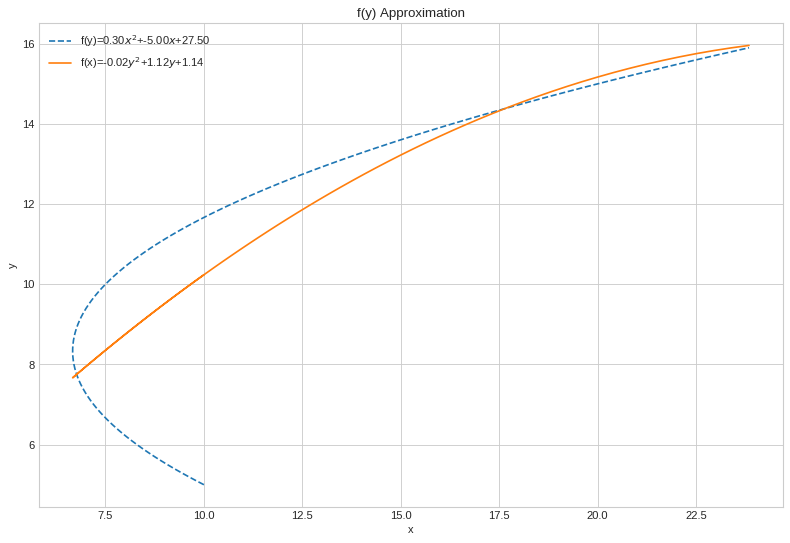

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')

yy = np.arange(5,16,0.1)
xx = 0.3*yy**2-5*yy+27.5
f = np.array([27.5,-5,0.3])
plt.plot(xx,yy,'--',label=f'f(y)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(xx, yy, 2, cov=True)
print("covy",covy)
f = np.poly1d(fity)
print("f",f)
plt.plot(xx,f(xx),label=f'f(x)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()


In [151]:
y=np.array([7,12,16,16.1])
x = 0.3*y**2-5*y+27.5
print("x",x)
print(f(x))

x [ 7.2   10.7   24.3   24.763]
[ 7.052      8.347     83.147     87.6468507]


f             2
-5.365e-17 x + 1e-06 x + 1
f             2
-2.497e-17 x + 0.0001 x + 0.9999


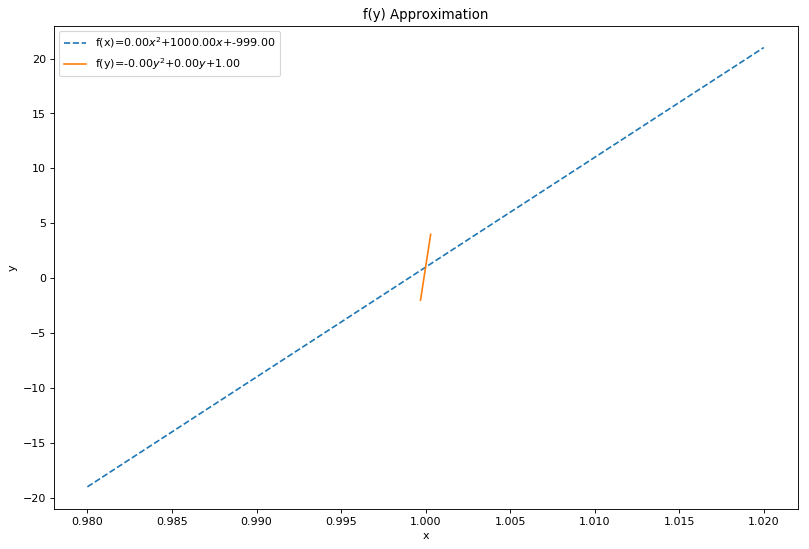

In [96]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')
y = np.array([-2,0,2,4])
x = np.array([1,0.999,1.001,1])
fitx, covx = np.polyfit(x, y, 2, cov=True)
print("f",f)
f = np.poly1d(fitx)
xx = np.arange(0.98,1.02,0.001)
plt.plot(xx,f(xx),'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(y, x, 2, cov=True)
f = np.poly1d(fity)
print("f",f)
yy = np.arange(-2,4,0.01)
plt.plot(f(yy),yy,label=f'f(y)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()

In [204]:
from scipy.spatial.distance import cdist
a0, a1, a2  = 1, 1, 1
M = np.array([[1,2],[3,4],[5,10]])
x = np.linspace(0,10,10*10)
y = a0 + a1*x + a2*x**2
pol = np.array([x,y]).T
print(M.shape, pol.shape)
dists = cdist(M, pol)
print(dists.shape)
ind = np.argmin(dists,axis=1)
D = pol[ind,:]
print(D.shape)
print(D,M)

(3, 2) (100, 2)
(3, 100)
(3, 2)
[[ 0.70707071  2.20701969]
 [ 1.41414141  4.41393735]
 [ 2.62626263 10.52351801]] [[ 1  2]
 [ 3  4]
 [ 5 10]]


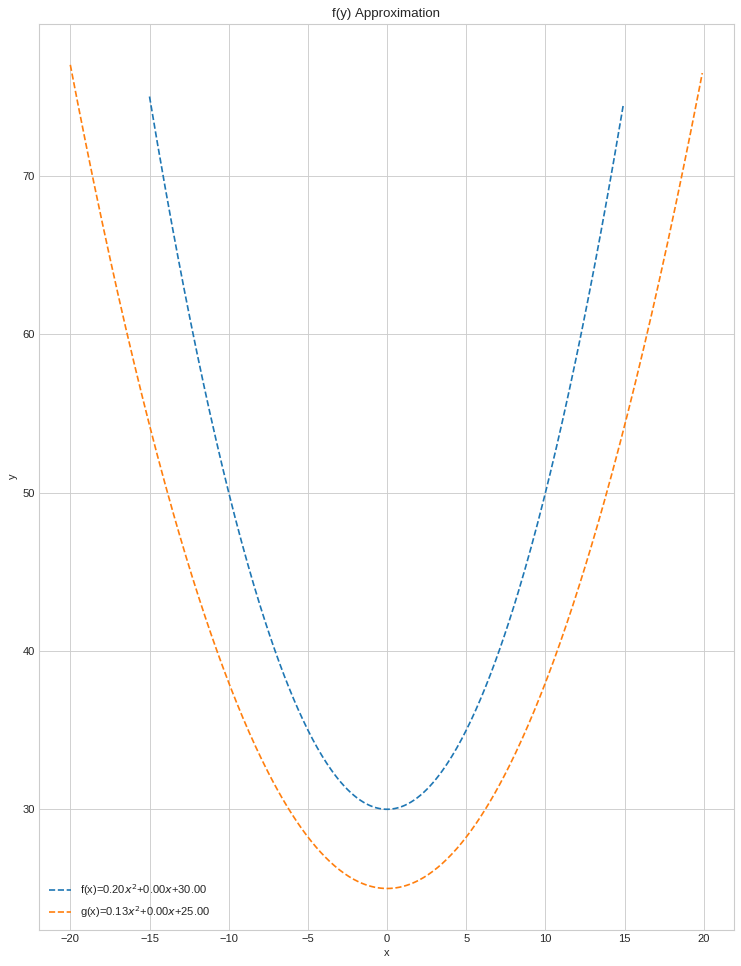

In [328]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(20, 15), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")

plt.title(r"f(y) Approximation")

plt.xlabel('x')
plt.ylabel('y')
f = [30,0,0.2]
f2 = [25,0,0.13]
xx = np.arange(-15,15,0.1)
yy = f[0] + f[1]*xx + f[2]*xx**2
plt.plot(xx,yy,'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

xx = np.arange(-20,20,0.1)
yy = f2[0] + f2[1]*xx + f2[2]*xx**2
plt.plot(xx,yy,'--',label=f'g(x)={f2[2]:.2f}$x^2$+{f2[1]:.2f}$x$+{f2[0]:.2f}')

plt.axis('scaled')

plt.legend()


x [14.   14.05 14.1  14.15 14.2  14.25 14.3  14.35 14.4  14.45 14.5  14.55
 14.6  14.65 14.7  14.75 14.8  14.85 14.9  14.95 15.   15.05 15.1  15.15
 15.2  15.25 15.3  15.35 15.4  15.45 15.5  15.55 15.6  15.65 15.7  15.75
 15.8  15.85 15.9  15.95]
f1         2
-150.9 x + 19.58 x - 0.5447
[-29507.84660637 -29719.21893808 -29931.34562539 -30144.2266683
 -30357.86206681 -30572.25182093 -30787.39593065 -31003.29439597
 -31219.94721689 -31437.35439341 -31655.51592554 -31874.43181326
 -32094.1020566  -32314.52665553] [5262.296 5300.057 5337.953 5375.984 5414.15  5452.451 5490.887 5529.458
 5568.164 5607.005 5645.981 5685.092 5724.338 5763.719]
28072.503517743433


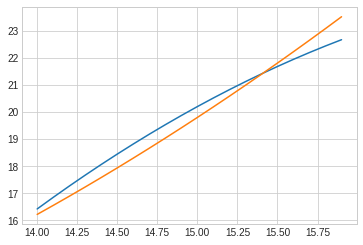

In [106]:
from numpy.polynomial import polynomial as P
def innerProductPolynoms(f1, f2, xmin, xmax):
    dx = 0.05
    x = np.arange(xmin,xmax,dx)
    print("x",x)
    #f1 = np.poly1d(f1)
    #f2 = np.poly1d(f2)
    y1 = f1(x)
    y2 = f2(x)
    print("f1",f1)
    
    print(y1[1:15], y2[1:15])

    dist = np.sqrt(np.sum((y2-y1)**2*dx)) / (xmax-xmin)

    return dist

x = np.arange(14,16,0.1)
y1 = -150.87112042354389 + 19.575405784692236*x -0.544708238720031*x**2
y2 = 27 - 4.83*x+0.29*x**2
f1 = np.poly1d([-150.87112042354389,19.575405784692236,-0.544708238720031])
f2 = np.poly1d([27,-4.83,0.29])
plt.plot(x,y1)
plt.plot(x,y2)

dist = innerProductPolynoms(f1, f2, 14, 16)
print(dist)

In [107]:
-151+19.58*14-0.5447*14**2

16.358800000000016